In [1]:
using PlotlyJS
using LinearAlgebra
output = true

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-7423719263308051456\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-13453047487472730498\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-7423719263308051456\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

true

In [2]:
function gershgorin_plot(A)
    D, V = eigen(A)

    n = size(A,1)
    la = Layout(width=400, height= 300, yaxis_scaleanchor="x")

    tr = scatter(x=real.(D), y=imag.(D), mode="markers")

    ShapeType = PlotlyBase.PlotlyAttribute{Dict{Symbol,Any}}
    la["shapes"] = Array{ShapeType}(undef,n)
    colors = ["blue","green","red"]
    for i=1:n
        x_center = A[i,i]
        radius = max(0.05, sum(abs.(A[i,:])) - abs(A[i,i]))
        x0 = A[i,i] - radius; y0 = - radius; x1 = A[i,i] + radius; y1 = radius;

        c1 = Dict(:type=>"circle",
                  :xref=>"x", :yref=>"y", 
                  :x0=>x0, :y0=>y0, :x1=>x1, :y1=>y1,
                  :fillcolor=>colors[i], :opacity=>0.2)
        la["shapes"][i] = attr(c1)
    end
    return plot([tr], la)
end

gershgorin_plot (generic function with 1 method)

(A, D) = ([1.0 0.5 0.0; -1.0 2.0 0.0; 0.0 0.0 -1.0], [1.0 0.0 0.0; 0.0 2.0 0.0; 0.0 0.0 -1.0])


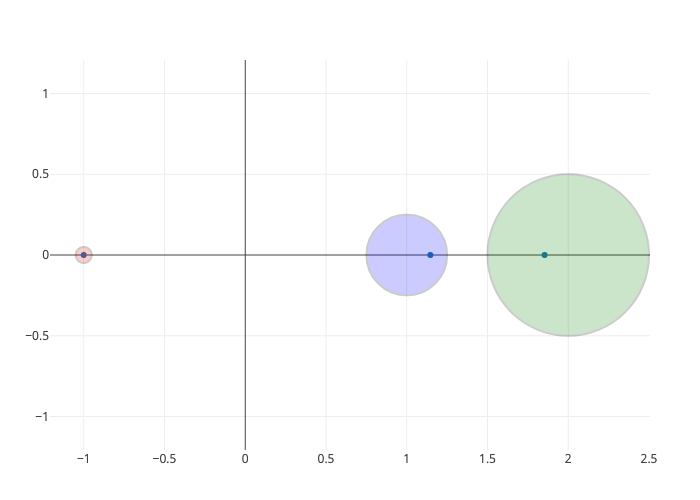

"fig_la8_a.pdf"

In [3]:
A = [1 1/2 0; -1 2 0; 0 0 -1]
D = diagm(diag(A))
@show A, D
p = gershgorin_plot(.5*D + 0.5*A)
display(p)
if output
    PlotlyJS.savefig(p,"fig_la8_a.pdf")
end

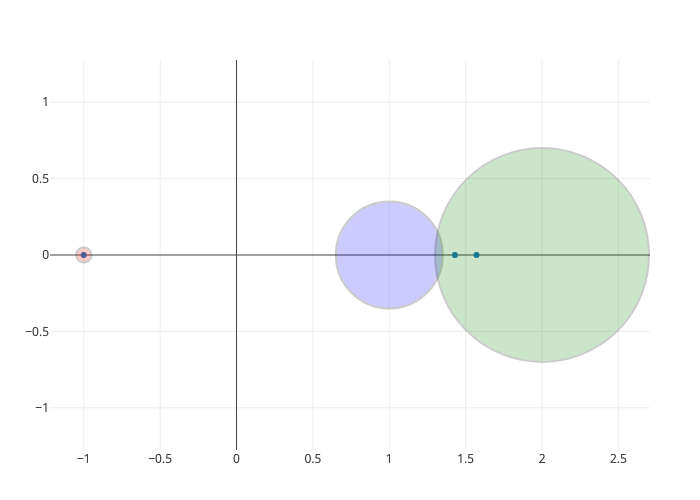

"fig_la8_b.pdf"

In [4]:
p = gershgorin_plot(.3*D + 0.7*A)
display(p)
if output
    PlotlyJS.savefig(p,"fig_la8_b.pdf")
end

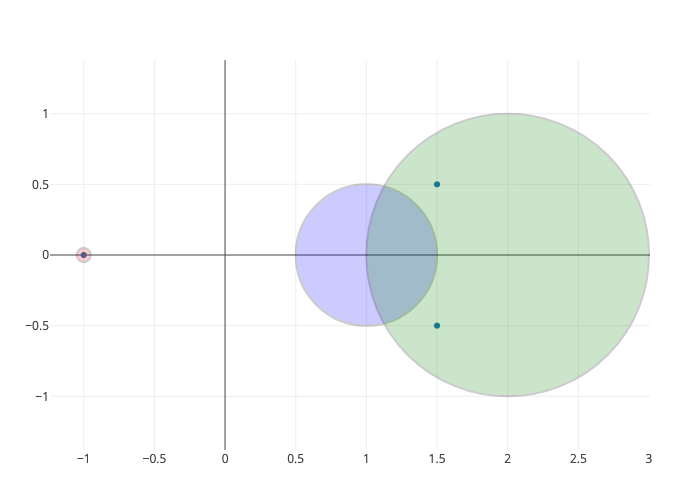

"fig_la8_c.pdf"

In [5]:
p = gershgorin_plot(A)
display(p)
if output
    PlotlyJS.savefig(p,"fig_la8_c.pdf")
end